In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
df = pd.DataFrame({
    'X' : [1,2,3,4,5],
    'Y' : [1.3,1.8,3.5,4,4.5]
})

df.head()

,X,Y
0,1,1.3
1,2,1.8
2,3,3.5
3,4,4.0
4,5,4.5


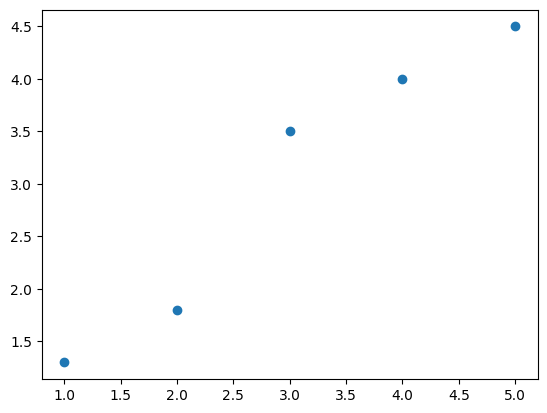

In [9]:
#plotando o df
fig, ax = plt.subplots()

ax.scatter(df.X, df.Y)
plt.show()

In [12]:
df['y_reta'] = df.X
df

,X,Y,y_reta
0,1,1.3,1
1,2,1.8,2
2,3,3.5,3
3,4,4.0,4
4,5,4.5,5


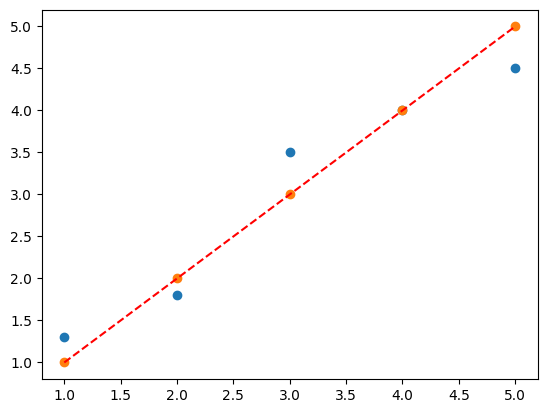

In [17]:
#plotando o df
fig, ax = plt.subplots()

ax.scatter(df.X, df.Y)
ax.scatter(df.X, df.y_reta)
ax.plot(df.X, df.y_reta, '--r')

plt.show()

In [21]:
from sklearn.linear_model import LinearRegression

In [26]:
#criando o regressor
reg = LinearRegression().fit(df.X.values.reshape(-1, 1), df.Y)

In [32]:
#coeficiente angular
a = reg.coef_[0]
a

0.8599999999999998

In [34]:
#coeficiente linear
b = reg.intercept_
b

0.44000000000000083

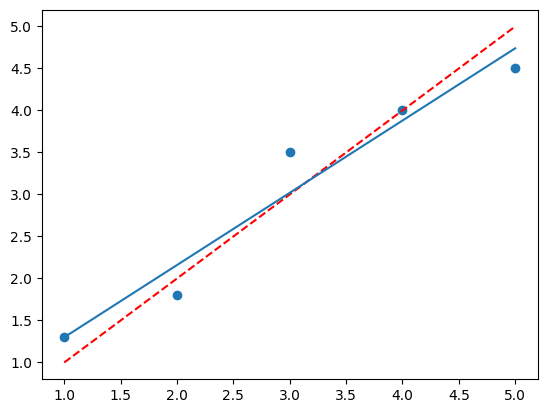

In [38]:
#vizualizando graficamente
fig, ax = plt.subplots()

ax.scatter(df.X, df.Y)
ax.plot(df.X, df.y_reta, '--r')

x = df.X.values
y = a * x + b
ax.plot(x,y)

plt.show()

In [41]:
#fazendo a previsão e adcionando na base

df['y_pred']= reg.predict(df.X.values.reshape(-1,1))
df

,X,Y,y_reta,y_pred
0,1,1.3,1,1.30
1,2,1.8,2,2.16
2,3,3.5,3,3.02
3,4,4.0,4,3.88
4,5,4.5,5,4.74


In [44]:
#calculando o erro da reta vermelha e da regressão

df['erro_reta'] = (df.Y - df.y_reta) ** 2
df['erro_pred'] = (df.Y - df.y_pred) ** 2
df

,X,Y,y_reta,y_pred,erro_reta,erro_pred
0,1,1.3,1,1.30,0.09,4.437343e-31
1,2,1.8,2,2.16,0.04,1.296000e-01
2,3,3.5,3,3.02,0.25,2.304000e-01
3,4,4.0,4,3.88,0.00,1.440000e-02
4,5,4.5,5,4.74,0.25,5.760000e-02


In [50]:
df[['erro_reta', 'erro_pred']].mean()

erro_reta    0.1260
erro_pred    0.0864
dtype: float64

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [51]:
#vizualizando o resultado da previsão
print(mean_absolute_error(df.Y, df.y_reta))
print(mean_squared_error(df.Y, df.y_reta))

print(mean_absolute_error(df.Y, df.y_pred))
print(mean_squared_error(df.Y, df.y_pred))



0.3
0.126
0.2400000000000002
0.08640000000000005
